In [1]:
# Import packages
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Data from: 

https://github.com/cityofaustin/transportation-data-publishing/wiki/Traffic-Count-Data-Publishing

under "Public Datasets"

Map for vehicle classification:

fieldmap = {

    'Total' : 'COUNT_TOTAL',
    'Motor Bikes' :'CLASS_1',
    'Cars & Trailers' :'CLASS_2',
    '2 Axle Long' :'CLASS_3',
    'Buses' :'CLASS_4',
    '2 Axle 6 Tire' :'CLASS_5',
    '3 Axle Single' :'CLASS_6',
    '4 Axle Single' :'CLASS_7',
    '<5 Axle Double' :'CLASS_8',
    '5 Axle Double' :'CLASS_9',
    '>6 Axle Double' :'CLASS_10',
    '<6 Axle Multi' :'CLASS_11',
    '6 Axle Multi' :'CLASS_12',
    '>6 Axle Multi' :'CLASS_13'
}

In [2]:
path = 'D:/Users/Bryan Lanier/Data/Traffic_Weather/'

In [3]:
loc_df = pd.read_csv(path+'Traffic_Studies__Locations__BETA_.csv') # Locations of the sensors 
speed_df = pd.read_csv(path+'Traffic_Studies__Speed_Reports__BETA_.csv') # Speed reports 
class_df = pd.read_csv(path+'Traffic_Studies__Vehicle_Classification_Reports.csv') # Classification of vehicles 
vol_df = pd.read_csv(path+'Traffic_Studies__Vehicle_Volume_Reports__BETA_.csv') # Volume of traffic 

In [4]:
vol_df.head()

,TRAFFIC_STUDY_COUNT_ID,ROW_ID,DATA_FILE,SITE_CODE,DATETIME,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,TIME,CHANNEL,COUNT_CHANNEL,COUNT_TOTAL
0,NaN,9d32ba097e762cecd7d76b5a212c61626f012237,6thStE1203WB.rdf,G20JDC,06/08/2015 04:00:00 PM,2015,6,8,0,16:00,WB,72,72
1,NaN,a5430dfba9d89c2c1c95d856e416b7b5159c6779,6thStE1203WB.rdf,G20JDC,06/08/2015 04:15:00 PM,2015,6,8,0,16:15,WB,52,52
2,NaN,c26f0612c31ab22b3509eeb834bf82a6adaca821,6thStE1203WB.rdf,G20JDC,06/08/2015 04:30:00 PM,2015,6,8,0,16:30,WB,90,90
3,NaN,5d6a47094fb76692f1ab03f5ba5b14bdc4dff6c6,6thStE1203WB.rdf,G20JDC,06/08/2015 04:45:00 PM,2015,6,8,0,16:45,WB,69,69
4,NaN,360e3cc6d4c92c7ae4edadcf43cee4b19f9561d3,6thStE1203WB.rdf,G20JDC,06/08/2015 05:00:00 PM,2015,6,8,0,17:00,WB,92,92


In [5]:
vol_df['YEAR'].value_counts()

2016    70501
2017    35033
2015    18336
Name: YEAR, dtype: int64

In [6]:
(vol_df['COUNT_CHANNEL'] - vol_df['COUNT_TOTAL']).sum()

-1146218

In [7]:
# vol_df.loc[vol_df['COUNT_CHANNEL'] != vol_df['COUNT_TOTAL']]

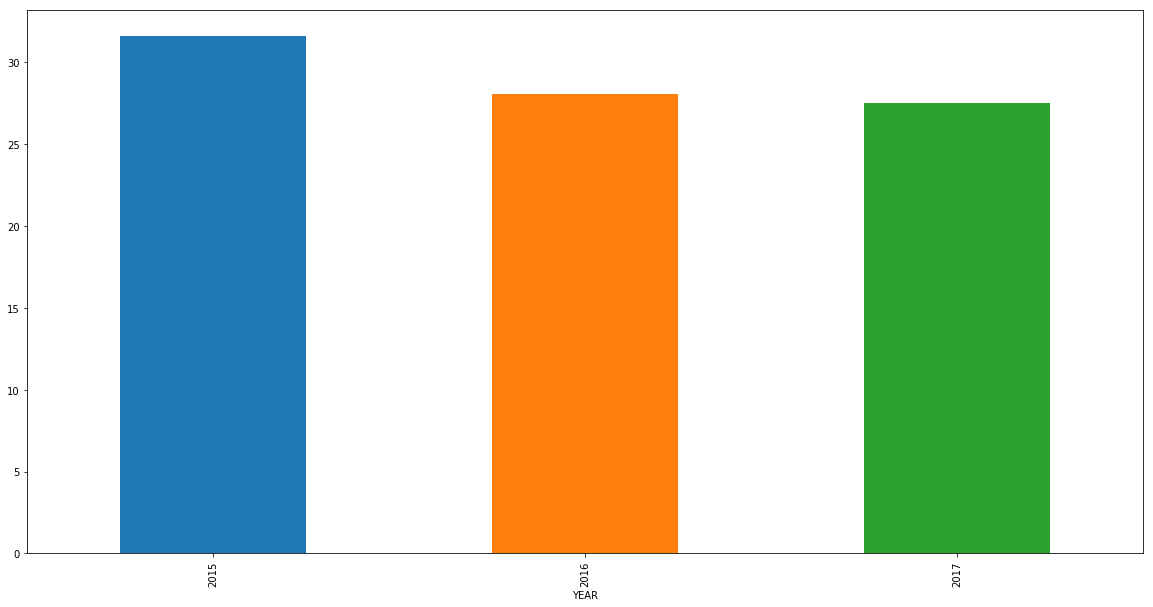

In [8]:
vol_df.groupby('YEAR').mean().COUNT_TOTAL.plot(kind='bar', figsize=(20,10))

In [9]:
# Make df of 2016 only, since that is the only year we have full data for 
df = vol_df.loc[vol_df['YEAR']==2016]
df = df.reset_index(drop=True)
df.head()

,TRAFFIC_STUDY_COUNT_ID,ROW_ID,DATA_FILE,SITE_CODE,DATETIME,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,TIME,CHANNEL,COUNT_CHANNEL,COUNT_TOTAL
0,1.0,7947d8e128c083d4758ef9943ff83d8af3e547ca,PecanParkBlvdBD.rdf,D2JMA/JDC,10/04/2016 03:00:00 PM,2016,10,4,1,15:00,EB,9,26
1,2.0,4443b048a7aeed6a485648117e9e519b46f76ea2,PecanParkBlvdBD.rdf,D2JMA/JDC,10/04/2016 03:00:00 PM,2016,10,4,1,15:00,WB,17,26
2,3.0,c6d28425deed4c33e833e0197509c54fdc78c3e9,PecanParkBlvdBD.rdf,D2JMA/JDC,10/04/2016 03:15:00 PM,2016,10,4,1,15:15,EB,11,26
3,4.0,ffe1bdca267991c9f6d92e382f951e248647e582,PecanParkBlvdBD.rdf,D2JMA/JDC,10/04/2016 03:15:00 PM,2016,10,4,1,15:15,WB,15,26
4,5.0,146fdeec6cbdf3e3f0482cba732291ff6e5cfaf3,PecanParkBlvdBD.rdf,D2JMA/JDC,10/04/2016 03:30:00 PM,2016,10,4,1,15:30,EB,6,14


In [10]:
# Change the time bin to be in line with the actual time 
def get_hour(t):
    hr = t[11:13]
    if t[-2:] == 'AM':
        if hr == '12':
            return 0
        return int(hr)
    else:
        if hr != '12':
            return (int(hr)+12)
        return 12

def get_min(t):
    m = t[14:16]
    return int(m)

def convert_back(x):
    if x < 10:
        return '0'+str(x)
    return str(x)

In [11]:
df['TB_hour'] = df['DATETIME'].apply(lambda x: get_hour(x))
df['TB_minute'] = df['DATETIME'].apply(lambda x: get_min(x))
df['TB_hour'] = df['TB_hour'].apply(lambda x: convert_back(x))
df['TB_minute'] = df['TB_minute'].apply(lambda x: convert_back(x))
df['Time_Bin'] = df['TB_hour'] + ':' + df['TB_minute']
df.head()

,TRAFFIC_STUDY_COUNT_ID,ROW_ID,DATA_FILE,SITE_CODE,DATETIME,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,TIME,CHANNEL,COUNT_CHANNEL,COUNT_TOTAL,TB_hour,TB_minute,Time_Bin
0,1.0,7947d8e128c083d4758ef9943ff83d8af3e547ca,PecanParkBlvdBD.rdf,D2JMA/JDC,10/04/2016 03:00:00 PM,2016,10,4,1,15:00,EB,9,26,15,00,15:00
1,2.0,4443b048a7aeed6a485648117e9e519b46f76ea2,PecanParkBlvdBD.rdf,D2JMA/JDC,10/04/2016 03:00:00 PM,2016,10,4,1,15:00,WB,17,26,15,00,15:00
2,3.0,c6d28425deed4c33e833e0197509c54fdc78c3e9,PecanParkBlvdBD.rdf,D2JMA/JDC,10/04/2016 03:15:00 PM,2016,10,4,1,15:15,EB,11,26,15,15,15:15
3,4.0,ffe1bdca267991c9f6d92e382f951e248647e582,PecanParkBlvdBD.rdf,D2JMA/JDC,10/04/2016 03:15:00 PM,2016,10,4,1,15:15,WB,15,26,15,15,15:15
4,5.0,146fdeec6cbdf3e3f0482cba732291ff6e5cfaf3,PecanParkBlvdBD.rdf,D2JMA/JDC,10/04/2016 03:30:00 PM,2016,10,4,1,15:30,EB,6,14,15,30,15:30


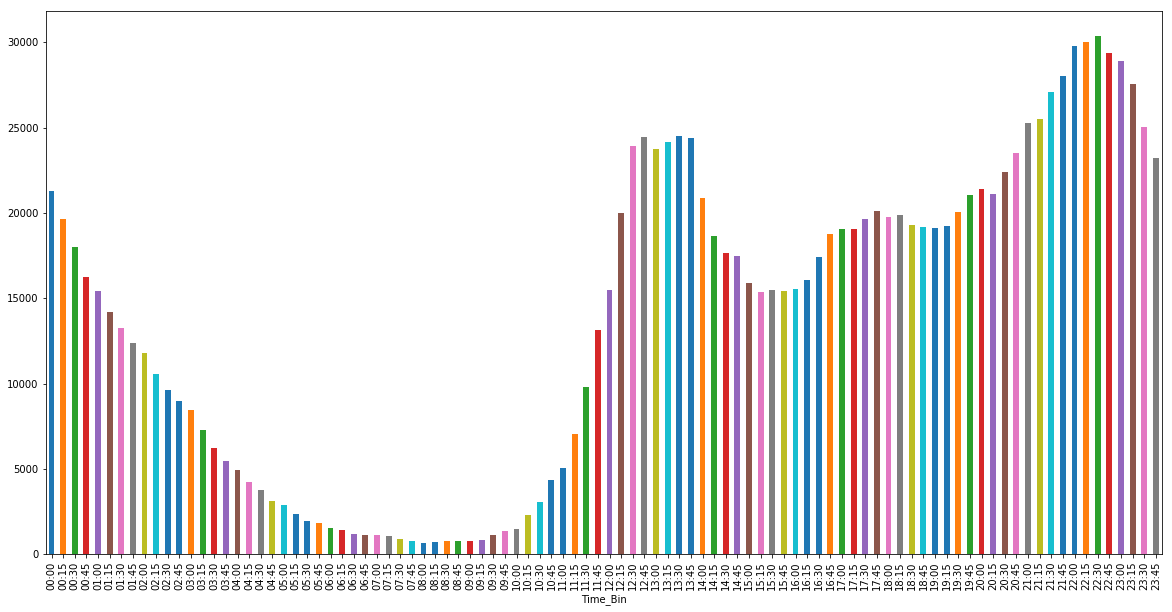

In [27]:
df.groupby('Time_Bin').sum().COUNT_CHANNEL.plot(kind='bar', figsize=(20,10))

In [23]:
df['DATA_FILE'].value_counts()

CummingsSt700blkBD.rdf                 592
JeffersonSt2800BlkBD.rdf               384
SanMarcosSt100BLkBDVol.rdf             384
RundbergLnW830BlkSB.rdf                384
BridlePath2700blkBD.rdf                384
3rdStWest628Blk@WestAveBD.rdf          288
2ndStE1311BlkBD2.rdf                   287
McCallRd2417BD.rdf                     192
BalconesClubDr9100BlkBD.rdf            192
SierraDr3912BlkBD.rdf                  192
BostonLn4600BlkBD.rdf                  192
YellowJacketLn2200BlkBD.rdf            192
WestrockDr2320BlkBD.rdf                192
CoventryLn5805BD.rdf                   192
PecanBrookeDr5704BlkBD.rdf             192
HammermillRun5930BD.rdf                192
W34th1800blkBD.rdf                     192
QuicksilverBlvd4805BD.rdf              192
WebbervilleRd1941BD.rdf                192
ShoalCreekBlvd4914BlkBD.rdf            192
MesaDr7200BlkBD.rdf                    192
PearsonRanchRdNofIveansWayBD.rdf       192
CollinwoodWDr1001BD.rdf                192
IveansWayBD

In [28]:
# vol_df.loc[vol_df['SITE_CODE']=='G15JMA']
# loc_df.loc[loc_df['SITE_CODE']=='G15JMA'].head()

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
import io

u = u"""latitude,longitude
42.357778,-71.059444
39.952222,-75.163889
25.787778,-80.224167
30.267222, -97.763889"""

# read in data to use for plotted points
buildingdf = pd.read_csv(io.StringIO(u), delimiter=",")
lat = buildingdf['latitude'].values
lon = buildingdf['longitude'].values

# determine range to print based on min, max lat and lon of the data
margin = 2 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

# create map using BASEMAP
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
m.drawcoastlines()
m.drawcountries()
m.drawstates()

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'